# Run Before Everything

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#%cd '/content/drive/MyDrive/AML_Project'

/content/drive/.shortcut-targets-by-id/1TAiRioTs7t_VaxDEmo0DPGdJZYbZS0J7/AML_Project


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import base64
import json
import seaborn as sns

In [ ]:
with zipfile.ZipFile('../Data/tracks.zip', 'r') as zip_ref:
    zip_ref.extractall("../Data")

# Data Preprocessing

In [4]:
tracks_df = pd.read_csv('../Data/tracks.csv')
tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
with zipfile.ZipFile('../Data/artists.zip', 'r') as zip_ref:
    zip_ref.extractall("../Data")

In [5]:
artists_df = pd.read_csv('../Data/artists.csv')
artists_df.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


The values for attributes artists and id_artists in the tracks dataset have to be reformatted into strings without the brackets and single quotes.
This is done in order to facilitate the merging of the two datasets: artists and tracks.

In [6]:
# reformatting values from the tracks dataframe
artists = tracks_df['artists']
new_artists = artists.str.strip("['")
new_artists = new_artists.str.strip("']")
tracks_df['artists'] = new_artists

artists_id = tracks_df['id_artists']
new_artists_id = artists_id.str.strip("['")
new_artists_id = new_artists_id.str.strip("']")
tracks_df['id_artists'] = new_artists_id

tracks_df.rename(columns={'id_artists': 'id_artists_tracks'}, inplace=True)

In [7]:
# merging the 2 dataframes
merged_df = tracks_df.merge(artists_df, how='inner', left_on='id_artists_tracks', right_on='id', suffixes=('_tracks', '_artists'))

# removing duplicated columns
id_artists = merged_df['id_artists']
merged_df = merged_df.drop(columns=['artists', 'id_artists_tracks'])
merged_df['id_artists'] = id_artists

merged_df

,id_tracks,name_tracks,popularity_tracks,duration_ms,explicit,release_date,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,id_artists,followers,genres,name_artists,popularity_artists
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,1922-02-22,0.645,0.44500,0,-13.338,...,0.744000,0.1510,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
1,0PH9AACae1f957JAavhOl2,Lazy Boi,0,157333,0,1922-02-22,0.298,0.46000,1,-18.645,...,0.856000,0.4360,0.402,87.921,4,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
2,2SiNuAZ6jIU9xhClRKXcST,Sketch,0,87040,0,1922-02-22,0.634,0.00399,5,-29.973,...,0.919000,0.1050,0.396,79.895,4,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
3,4vV7uBcF2AnjNTOejBS5oL,L'enfer,0,40000,0,1922-02-22,0.657,0.32500,10,-14.319,...,0.856000,0.0931,0.105,81.944,5,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
4,598LlBn6jpEpVbLjmZPsYV,Graphite,0,104400,0,1922-02-22,0.644,0.68400,7,-8.247,...,0.802000,0.0847,0.138,100.031,4,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470033,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,2020-02-25,0.528,0.67300,4,-3.639,...,0.000000,0.0989,0.297,130.066,4,5VGgFE9nPgMfEnYiPT5J2B,929.0,['chinese viral pop'],芝麻,36
470034,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,2020-10-30,0.609,0.01720,8,-28.573,...,0.973000,0.1080,0.890,68.619,4,7vgGpuiXdNlCmc994PlMlz,23.0,['instrumental lullaby'],Laureen Conrad,52
470035,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,2020-03-20,0.562,0.03310,1,-25.551,...,0.961000,0.1110,0.386,63.696,3,4MxqhahGRT4BPz1PilXGeu,91.0,['instrumental lullaby'],Gregory Oberle,55
470036,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,2020-09-26,0.560,0.51800,0,-7.471,...,0.000000,0.0648,0.211,131.896,4,1QLBXKM5GCpyQQSVMNZqrZ,896.0,['chinese viral pop'],阿YueYue,38


In [8]:
print(len(merged_df))
print(len(artists_df))
print(len(tracks_df))

470038
1162095
586672


In [9]:
print(len(merged_df.columns))
merged_df.columns

23


Index(['id_tracks', 'name_tracks', 'popularity_tracks', 'duration_ms',
       'explicit', 'release_date', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'id_artists', 'followers',
       'genres', 'name_artists', 'popularity_artists'],
      dtype='object')

We have 23 columns or features. There are:

*   Numerical features (16): duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, followers, popularity_artists
*   Categorical features (4): id_tracks, name_tracks, id_artists, name_artists
*   Date feature (1): release_date
*   Other feature (1): genres (array of genres for that artist)
*   Target: popularity_tracks

In [10]:
#@title Repopulation and restoration of popularity_tracks and popularity_artists columns

print(merged_df.isnull().all())
print(merged_df.isna().all())
#No missing values

id_tracks             False
name_tracks           False
popularity_tracks     False
duration_ms           False
explicit              False
release_date          False
danceability          False
energy                False
key                   False
loudness              False
mode                  False
speechiness           False
acousticness          False
instrumentalness      False
liveness              False
valence               False
tempo                 False
time_signature        False
id_artists            False
followers             False
genres                False
name_artists          False
popularity_artists    False
dtype: bool
id_tracks             False
name_tracks           False
popularity_tracks     False
duration_ms           False
explicit              False
release_date          False
danceability          False
energy                False
key                   False
loudness              False
mode                  False
speechiness           False
acoustic

# Initial Data Exploration

#### columns

In [11]:
num_features = ['duration_ms', 'explicit', 'danceability', 'energy', 'key',
                'loudness', 'mode', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo',
                'time_signature', 'followers', 'popularity_artists']
cat_features = ['id_tracks', 'name_tracks', 'id_artists', 'name_artists']
date_feature = ['release_date']
other_feature = ['genres']
target = ['popularity_tracks']

In [12]:
merged_df['duration_ms'].unique()

array([126903, 157333,  87040, ..., 331839, 276342, 203555])

#### Histograms for the numerical features

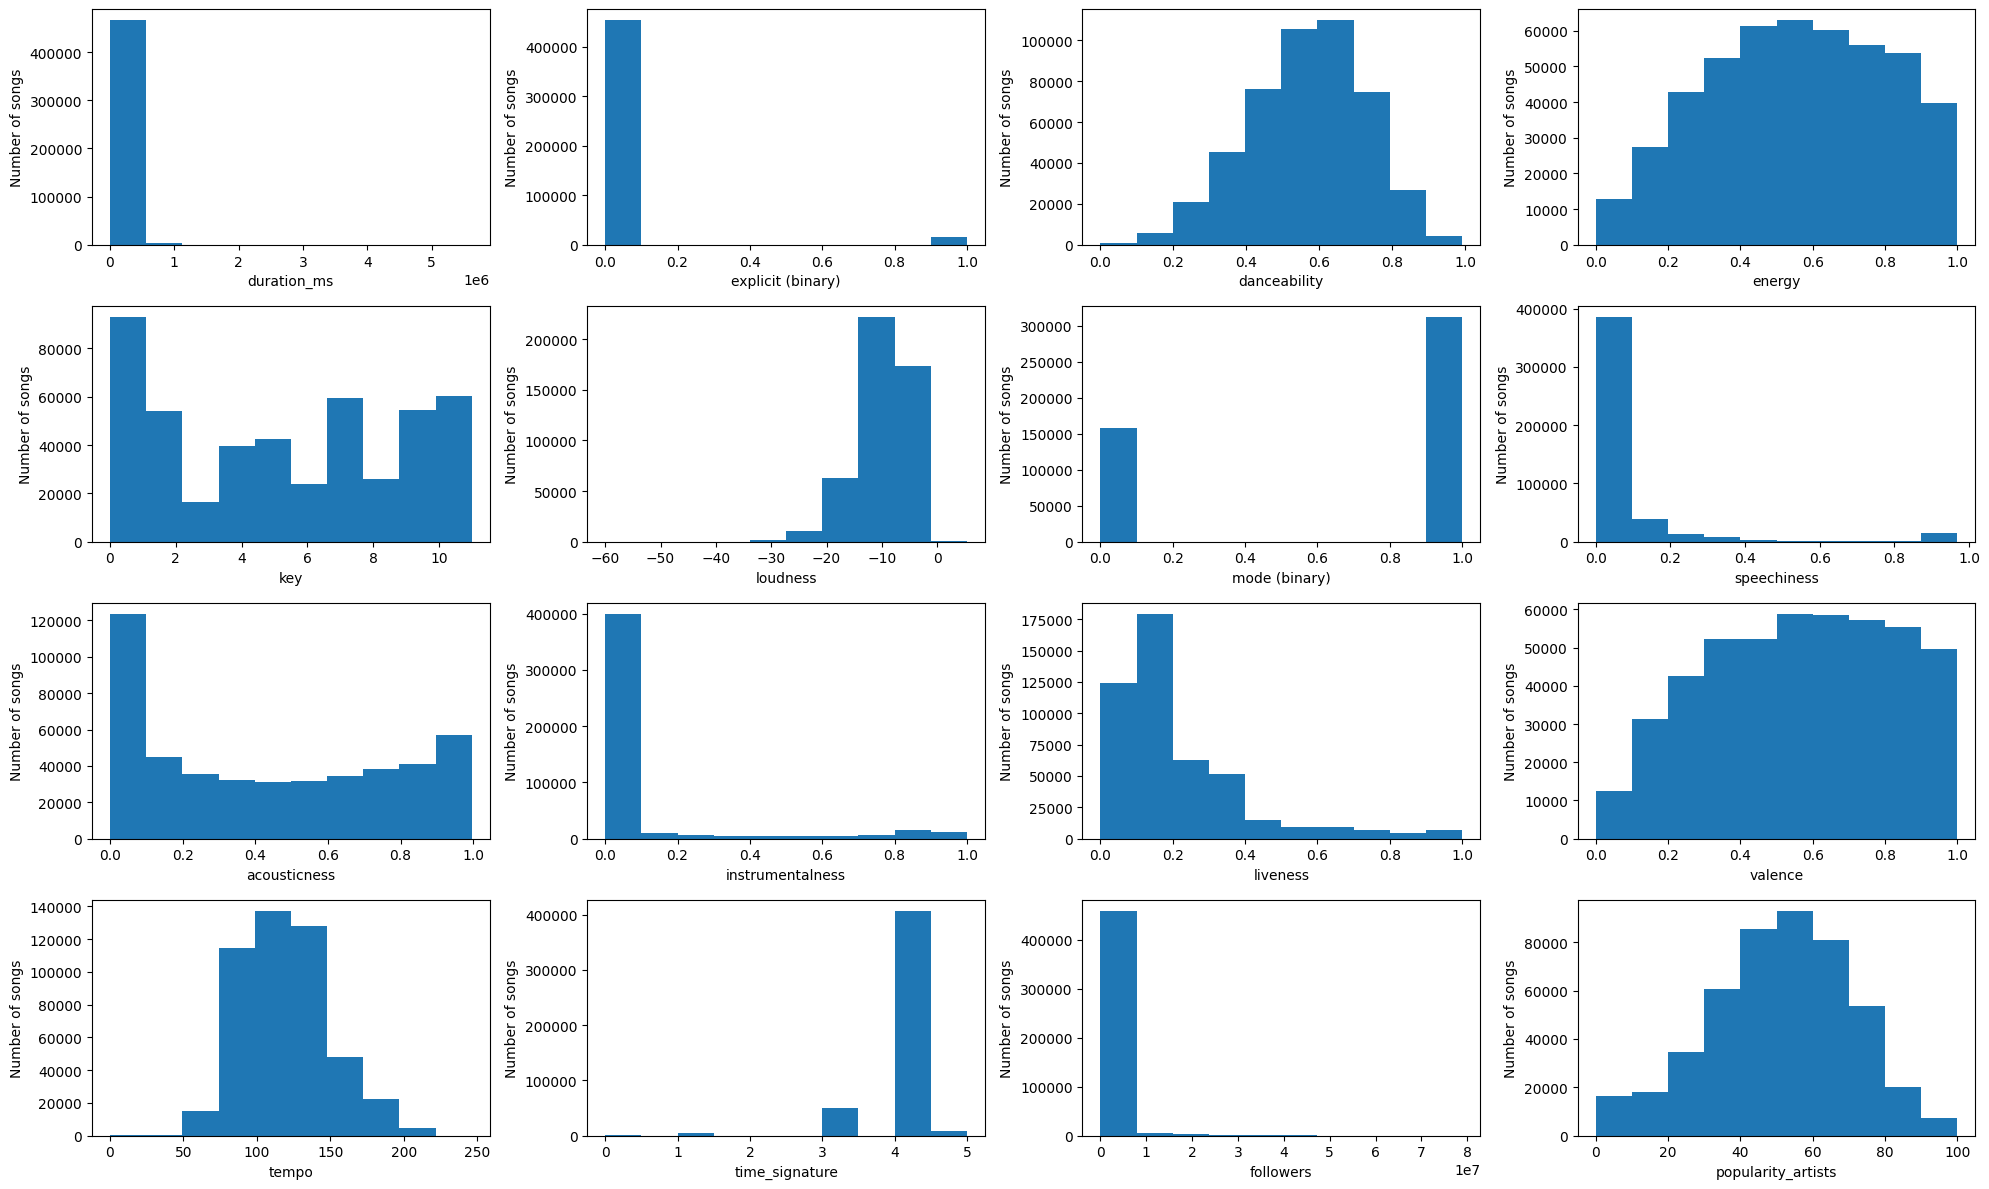

In [13]:
fig = plt.figure(tight_layout=True, figsize=(20, 12))
count = 0

for feature in num_features:
  count += 1

  ax = fig.add_subplot(4, 4, count)
  ax.hist(merged_df[feature])
  ax.set_ylabel('Number of songs')
  if merged_df[feature].nunique() == 2:
    ax.set_xlabel(feature + " (binary)")
  else:
    ax.set_xlabel(feature)

From the histograms above, we notice that some features:
- follow a normal distribution: danceability, energy, valence, tempo, and popularity_artists.
- are highly skewed to the left or right: loudness, speechiness, acousticness (more or less), instrumentalness, liveness, followers, time_signature (more or less).
- some features are binary: explicit, mode
- some features may have a random distribution: key
- some features have very high values and need to be represented using a logarithmic scale: followers

#### Correlation

<ipython-input-14-a4b1e5c3da6c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.drop(columns=['popularity_tracks']).corr()


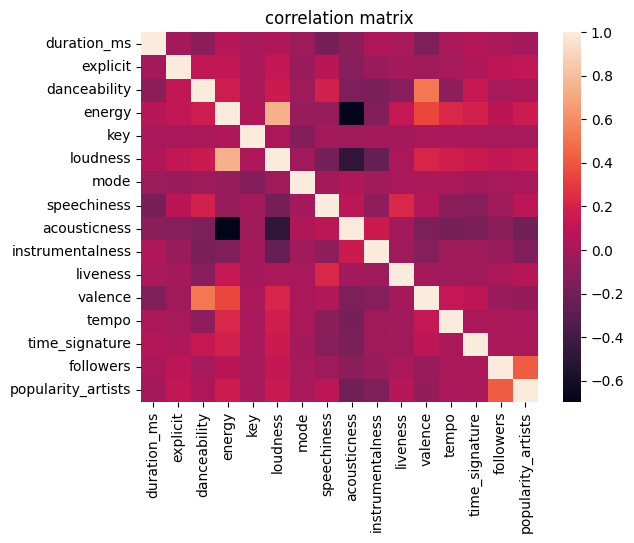

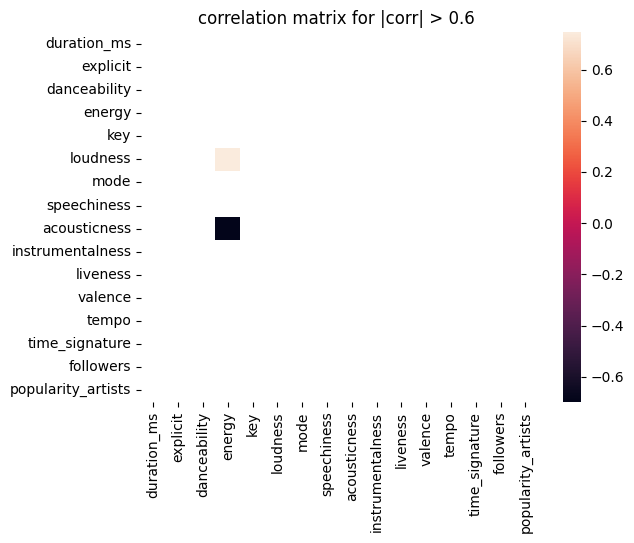

In [14]:
corr_matrix = merged_df.drop(columns=['popularity_tracks']).corr()

threshold = 0.6

thresh_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
thresh_mask |= np.abs(corr_matrix) < threshold

# show full heatmap
sns.heatmap(corr_matrix)
plt.title("correlation matrix")
plt.show()

sns.heatmap(corr_matrix, mask=thresh_mask)
plt.title("correlation matrix for |corr| > 0.6 ")
plt.show()

#### Popularity Distribution

<ipython-input-15-55a2d631e6a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df['popularity_tracks']).set_title('Popularity Distribution')


Text(0.5, 1.0, 'Popularity Distribution')

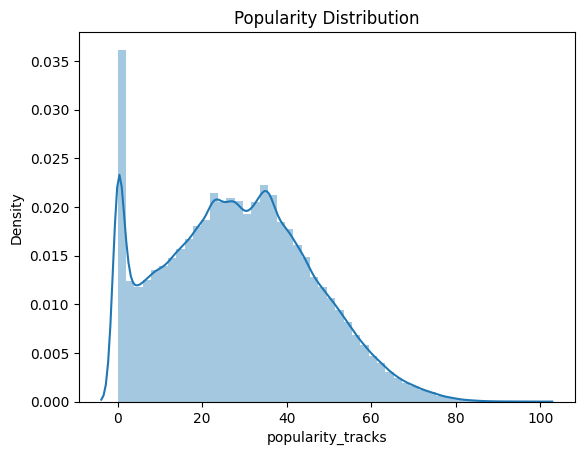

In [15]:
sns.distplot(merged_df['popularity_tracks']).set_title('Popularity Distribution')

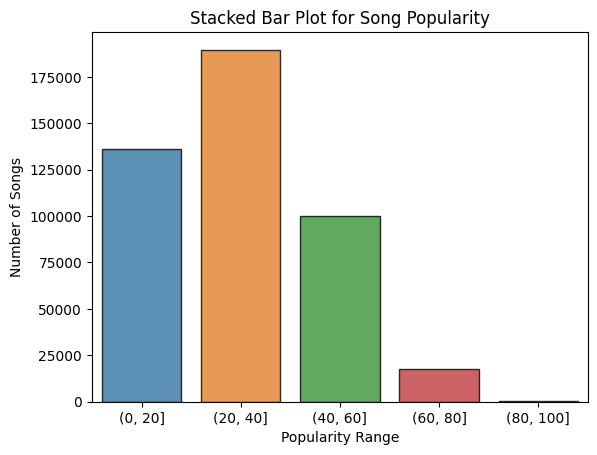

In [16]:
popularity = merged_df.groupby(pd.cut(merged_df['popularity_tracks'], bins=range(0, 101, 20))).size().reset_index(name='counts')

ax = sns.barplot(x='popularity_tracks', y='counts', data=popularity, edgecolor='black', linewidth=1, alpha=0.8)
ax.set_xlabel('Popularity Range')
ax.set_ylabel('Number of Songs')
ax.set_title('Stacked Bar Plot for Song Popularity')

plt.show()

#### Date Column Extraction + Visualization

In [17]:
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])
merged_df['year'] = merged_df['release_date'].dt.isocalendar().year
merged_df['month'] = merged_df['release_date'].dt.month
merged_df['day'] = merged_df['release_date'].dt.day
merged_df['dayofweek'] = merged_df['release_date'].dt.dayofweek
merged_df['weekofyear'] = merged_df['release_date'].dt.weekofyear
merged_df = merged_df.drop('release_date', axis=1)
merged_df.head()

<ipython-input-17-60c0b9fa6958>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  merged_df['weekofyear'] = merged_df['release_date'].dt.weekofyear


,id_tracks,name_tracks,popularity_tracks,duration_ms,explicit,danceability,energy,key,loudness,mode,...,id_artists,followers,genres,name_artists,popularity_artists,year,month,day,dayofweek,weekofyear
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,0.645,0.44500,0,-13.338,1,...,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4,1922,2,22,2,8
1,0PH9AACae1f957JAavhOl2,Lazy Boi,0,157333,0,0.298,0.46000,1,-18.645,1,...,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4,1922,2,22,2,8
2,2SiNuAZ6jIU9xhClRKXcST,Sketch,0,87040,0,0.634,0.00399,5,-29.973,0,...,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4,1922,2,22,2,8
3,4vV7uBcF2AnjNTOejBS5oL,L'enfer,0,40000,0,0.657,0.32500,10,-14.319,0,...,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4,1922,2,22,2,8
4,598LlBn6jpEpVbLjmZPsYV,Graphite,0,104400,0,0.644,0.68400,7,-8.247,1,...,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4,1922,2,22,2,8


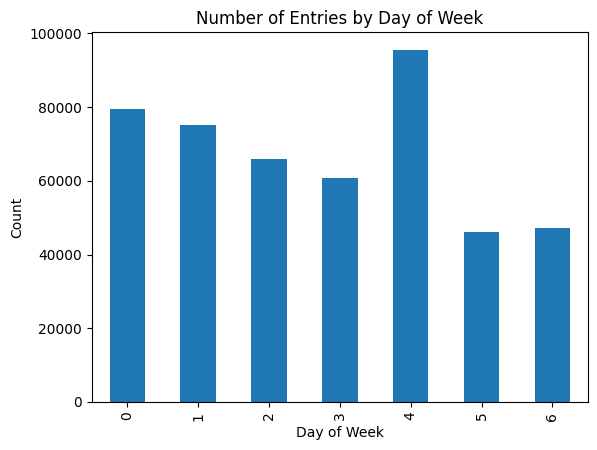

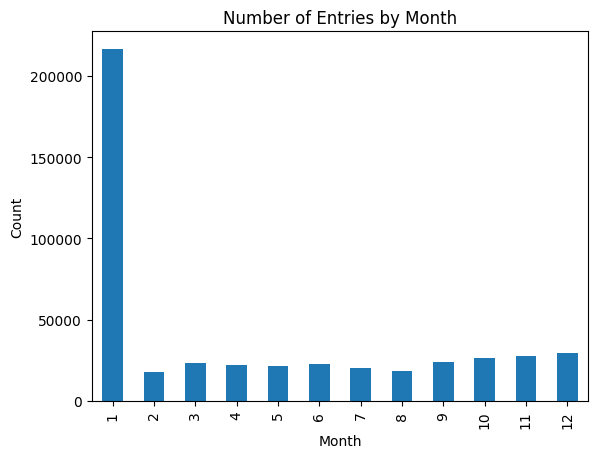

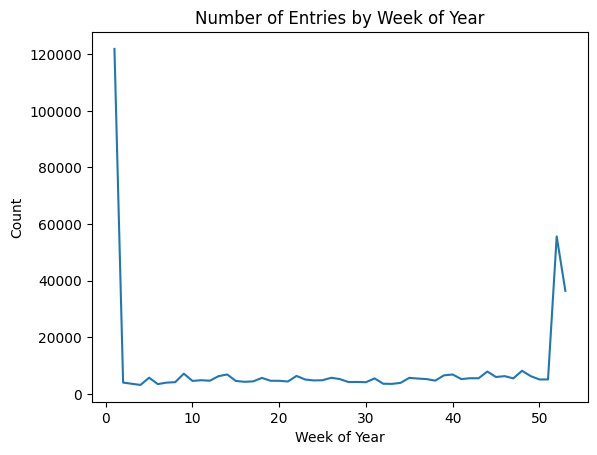

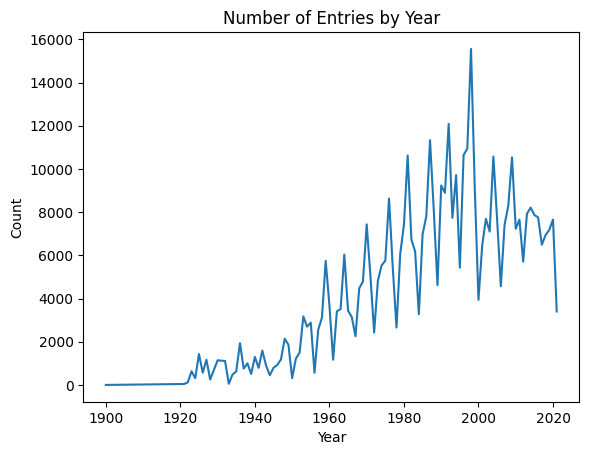

In [18]:
# group the data by day of the week and create a bar chart
merged_df.groupby('dayofweek')['dayofweek'].count().plot(kind='bar')
plt.title('Number of Entries by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

# group the data by month and create a bar chart
merged_df.groupby('month')['month'].count().plot(kind='bar')
plt.title('Number of Entries by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# group the data by the week of year and create a line chart
merged_df.groupby('weekofyear')['weekofyear'].count().plot(kind='line')
plt.title('Number of Entries by Week of Year')
plt.xlabel('Week of Year')
plt.ylabel('Count')
plt.show()

# group the data by year and create a line chart
merged_df.groupby('year')['year'].count().plot(kind='line')
plt.title('Number of Entries by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Conclusions: the datasets contains a lot of songs from January, more than any other month. They were more often released at the beginning of the year or a the end. The distribution within the week is fairly balanced.

#### Target visualization

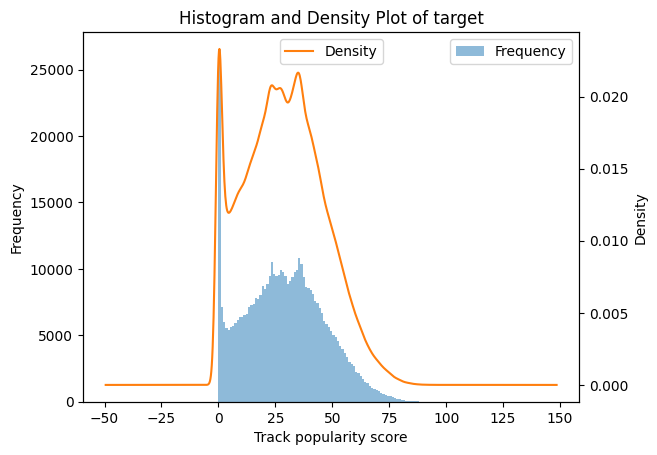

In [19]:
#density kernel plot and histogram

fig, ax = plt.subplots()

minimum = min(merged_df['popularity_tracks'].values)
maximum = max(merged_df['popularity_tracks'].values)
merged_df[target].plot(kind='hist', bins=range(minimum-1,maximum+1), ax=ax, alpha=0.5)
merged_df[target].plot(kind='density', ax=ax, secondary_y=True)

# add title and labels
ax.set_title('Histogram and Density Plot of target')
ax.set_xlabel('Track popularity score')
ax.set_ylabel('Frequency')
ax.right_ax.set_ylabel('Density')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Frequency'], loc='upper right')
handles, labels = ax.right_ax.get_legend_handles_labels()
ax.right_ax.legend(handles, ['Density'], loc='upper center')

# display the plot
plt.show()

#### Box plot visualization of the numerical features

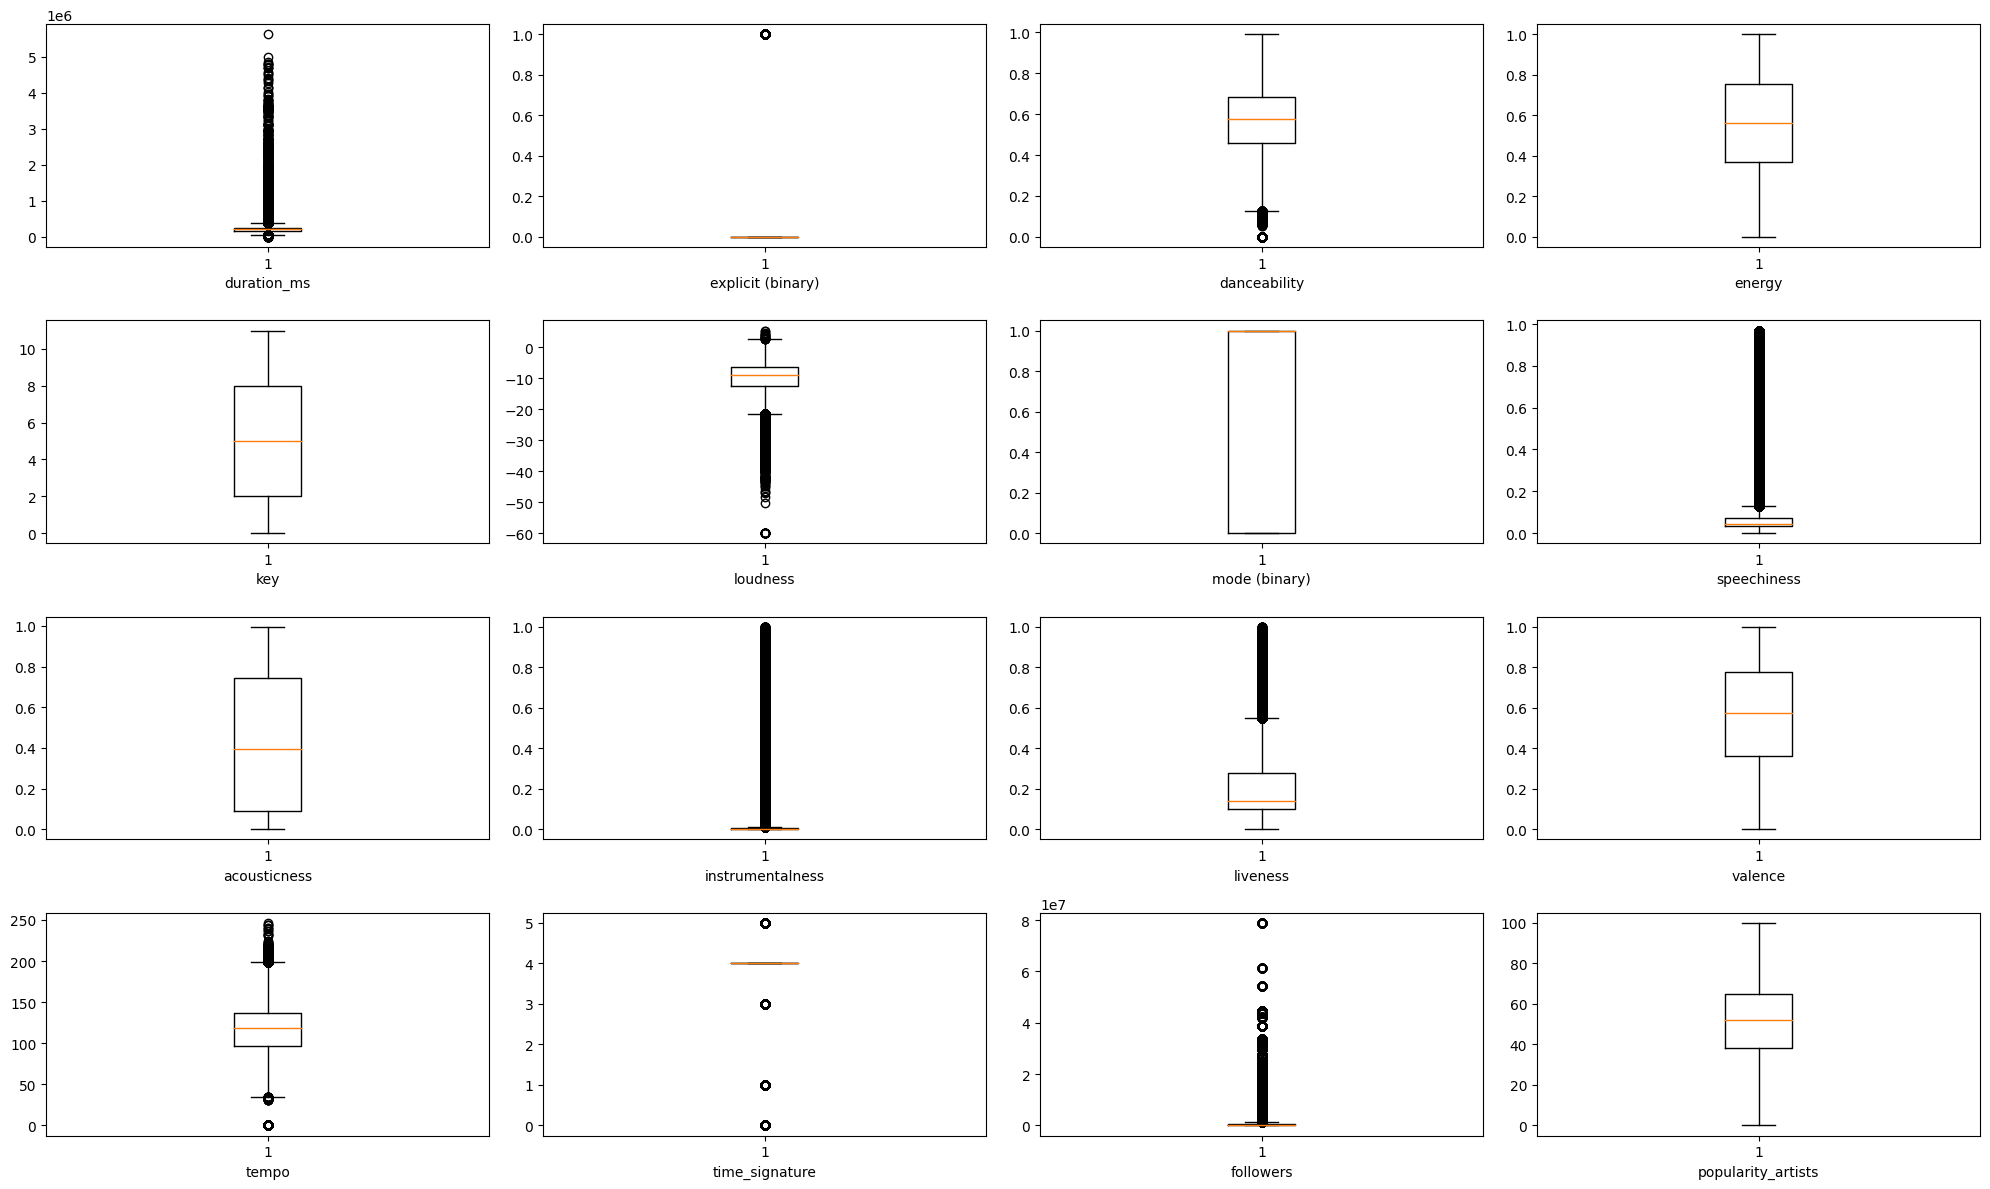

In [20]:
# box plots

box_plot_df = merged_df[num_features]

fig = plt.figure(tight_layout=True, figsize=(20, 12))
count = 0

for feature in num_features:
  count += 1

  ax = fig.add_subplot(4, 4, count)
  ax.boxplot(box_plot_df[feature])
  if merged_df[feature].nunique() == 2:
    ax.set_xlabel(feature + " (binary)")
  else:
    ax.set_xlabel(feature)

Conclusions: we can already see that some features have a spread range of values, such as acousticness (half of the values go from 0.1 to 0.8 on a 0-1 scale) and key (half of the values go from 2 to 8 on a 0-12 scale). Some features are more centered around the median, such as loudness (mostly around -10) and tempo (mostly around 125bpm).

#### Get rid of rows with empty genres

In [21]:
merged_df["popularity_tracks"].unique()

array([ 6,  0,  1,  5,  2,  9,  3, 10, 36,  8,  4, 21, 15, 28, 46, 20, 33,
       40, 11, 41, 30, 27, 26, 25, 23, 22, 17, 16, 18, 19, 14, 45, 39,  7,
       13, 55, 43, 12, 47, 24, 29, 44, 58, 53, 42, 74, 35, 34, 32, 31, 66,
       50, 65, 61, 56, 51, 64, 69, 37, 38, 49, 67, 59, 48, 62, 63, 52, 57,
       75, 77, 70, 60, 54, 79, 73, 68, 71, 72, 76, 83, 80, 78, 86, 82, 84,
       85, 81, 88, 95, 87, 91, 92, 90, 97, 96, 89, 94, 93, 99, 98])

In [22]:
merged_df.dtypes

id_tracks              object
name_tracks            object
popularity_tracks       int64
duration_ms             int64
explicit                int64
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
id_artists             object
followers             float64
genres                 object
name_artists           object
popularity_artists      int64
year                   UInt32
month                   int64
day                     int64
dayofweek               int64
weekofyear              int64
dtype: object

In [23]:
merged_df = merged_df[merged_df["genres"] != "[]"]

#### Outliers

###### Outliers for duration_ms

[Text(0.5, 1.0, 'duration_ms')]

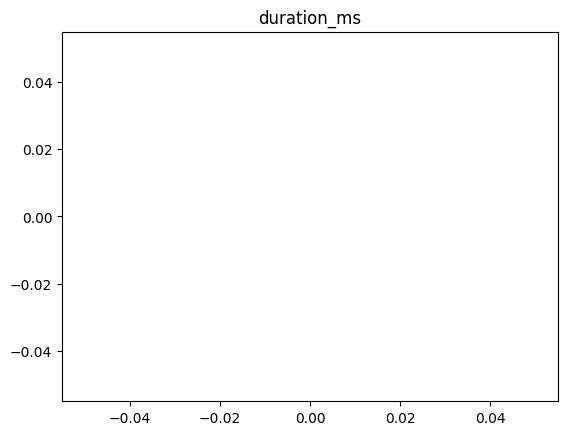

In [37]:
sns.histplot(merged_df, x="duration_ms", kde=True).set(title='duration_ms')

[Text(0.5, 1.0, 'duration_ms')]

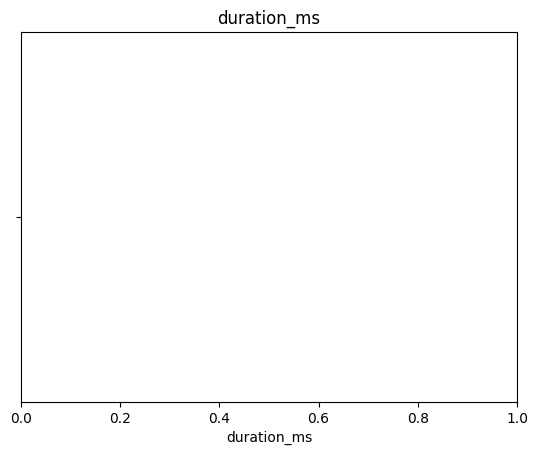

In [38]:
sns.boxplot(merged_df, x="duration_ms").set(title='duration_ms')

In [39]:
q75,q25 = merged_df["duration_ms"].describe()["75%"], merged_df["duration_ms"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

print("Outliers:", len(merged_df[(merged_df["duration_ms"] < min) | (merged_df["duration_ms"] > max)]))

Outliers: 0


[Text(0.5, 1.0, 'duration_ms_log')]

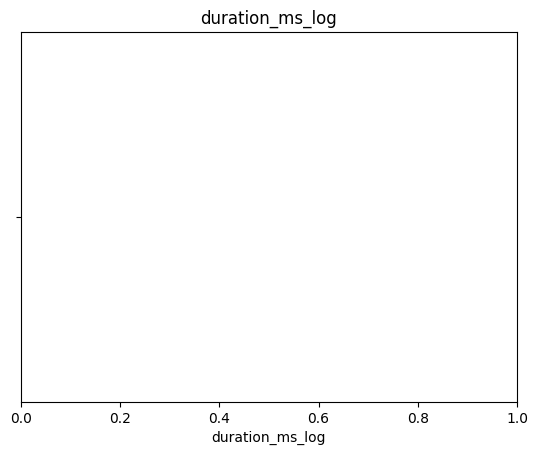

In [40]:
merged_df["duration_ms_log"] = np.log(merged_df["duration_ms"])
sns.boxplot(merged_df, x="duration_ms_log").set(title='duration_ms_log')

In [41]:
q75,q25 = merged_df["duration_ms_log"].describe()["75%"], merged_df["duration_ms_log"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

print("Outliers:", len(merged_df[(merged_df["duration_ms_log"] < min) | (merged_df["duration_ms_log"] > max)]))

Outliers: 0


In [42]:
merged_df.loc[(merged_df["duration_ms"] < min) | (merged_df["duration_ms"] > max), ["duration_ms"]] = np.nan

In [43]:
merged_df.loc[(merged_df["duration_ms"] < min) | (merged_df["duration_ms"] > max)]

,id_tracks,name_tracks,popularity_tracks,duration_ms,explicit,danceability,energy,key,loudness,mode,...,followers,genres,name_artists,popularity_artists,year,month,day,dayofweek,weekofyear,duration_ms_log


###### Outliers for danceability

[Text(0.5, 1.0, 'danceability')]

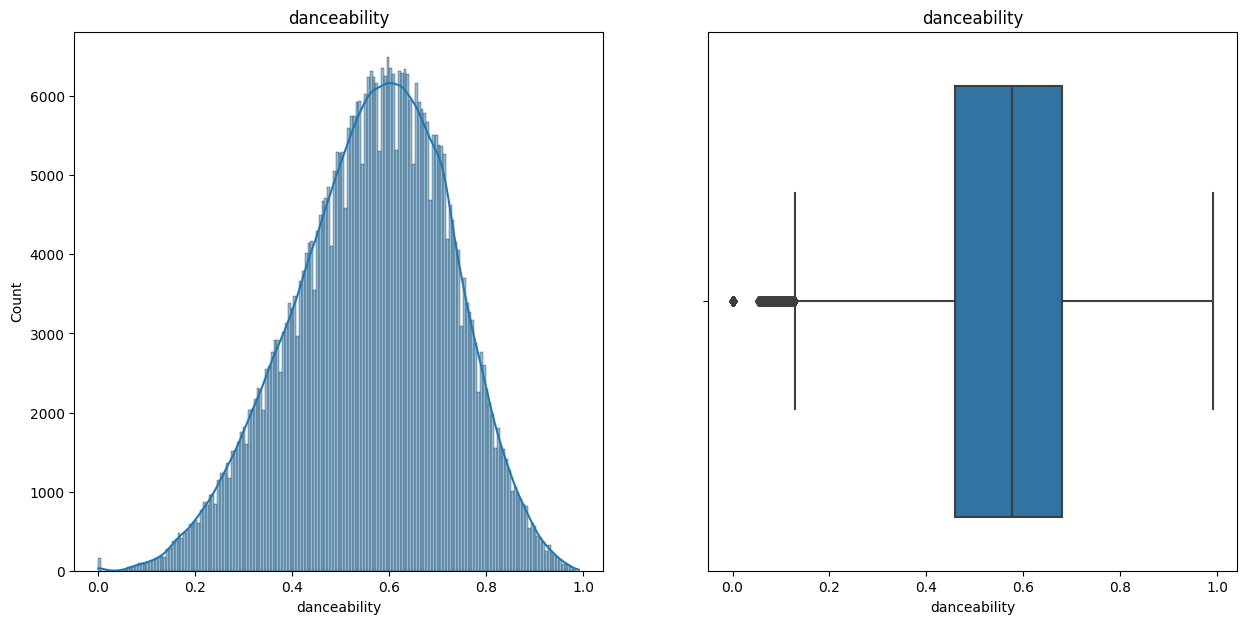

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(merged_df, x="danceability", kde=True, ax=axes[0]).set(title='danceability')
sns.boxplot(merged_df, x="danceability", ax=axes[1]).set(title='danceability')

In [45]:
q75,q25 = merged_df["danceability"].describe()["75%"], merged_df["danceability"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

print("Outliers:", len(merged_df[(merged_df["danceability"] < min) | (merged_df["danceability"] > max)]))

Outliers: 1317


###### Outliers for energy

[Text(0.5, 1.0, 'energy')]

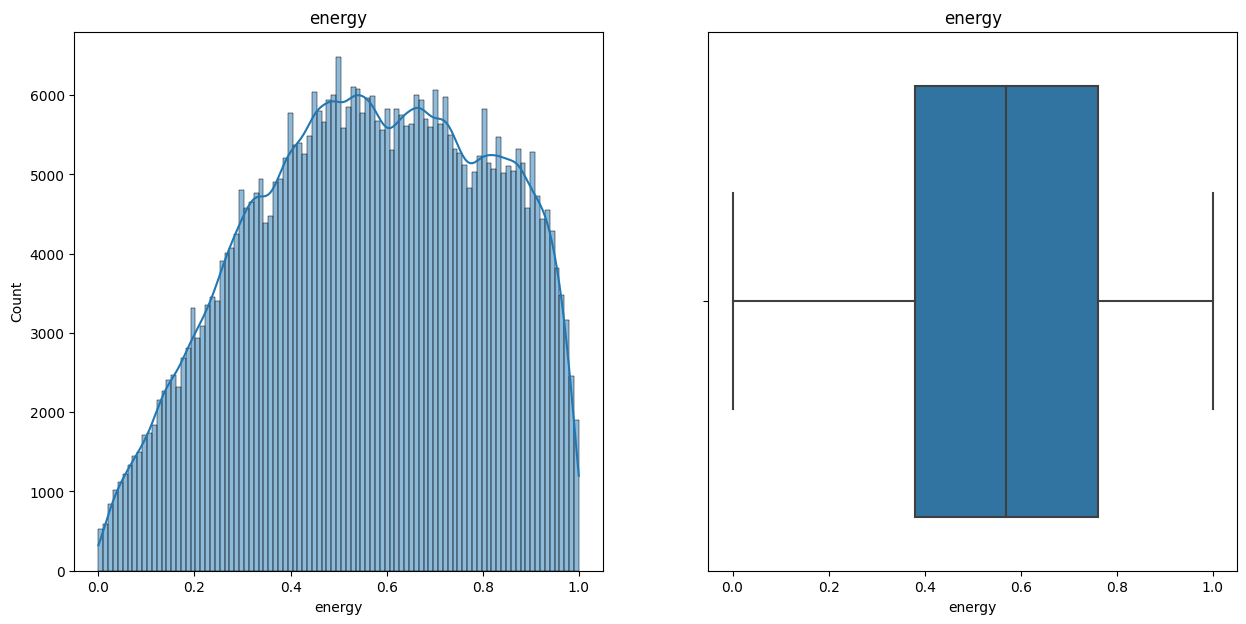

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(merged_df, x="energy", kde=True, ax=axes[0]).set(title='energy')
sns.boxplot(merged_df, x="energy", ax=axes[1]).set(title='energy')

In [47]:
q75,q25 = merged_df["energy"].describe()["75%"], merged_df["energy"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

print("Outliers:", len(merged_df[(merged_df["energy"] < min) | (merged_df["energy"] > max)]))

Outliers: 0


###### Outliers for loudness

[Text(0.5, 1.0, 'loudness')]

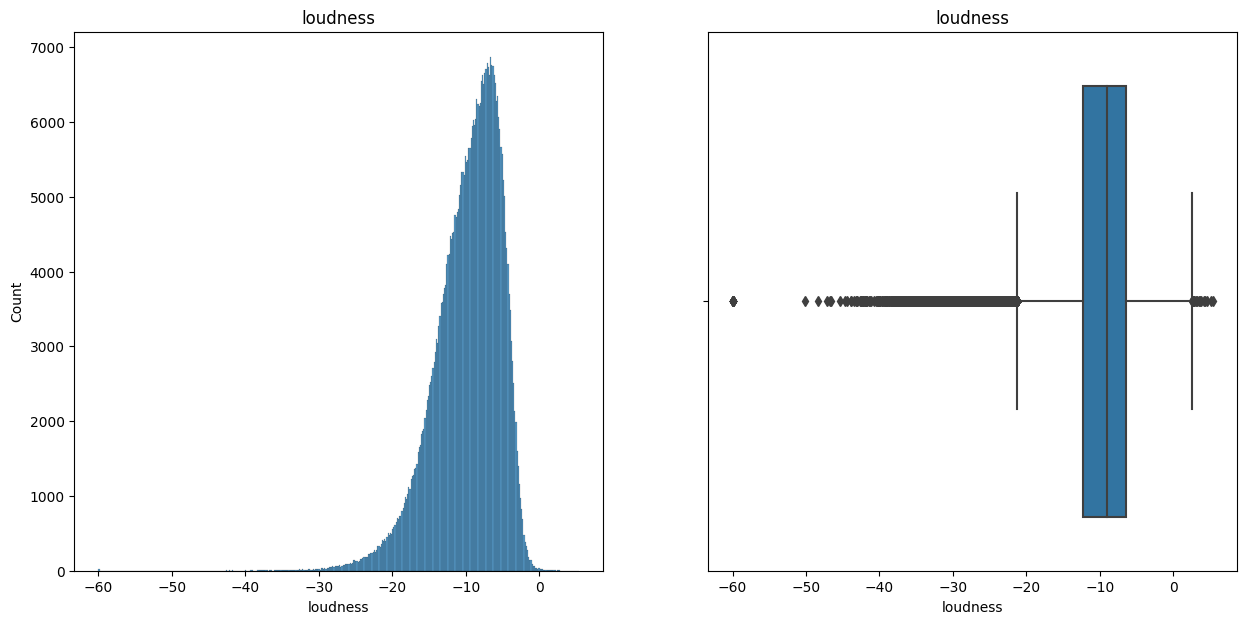

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(merged_df, x="loudness", ax=axes[0]).set(title='loudness')
sns.boxplot(merged_df, x="loudness", ax=axes[1]).set(title='loudness')

In [49]:
q75,q25 = merged_df["loudness"].describe()["75%"], merged_df["loudness"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

print("Outliers:", len(merged_df[(merged_df["loudness"] < min) | (merged_df["loudness"] > max)]))

Outliers: 8249


###### Outliers for mode

[Text(0.5, 1.0, 'Mode wrt Popularity_tracks')]

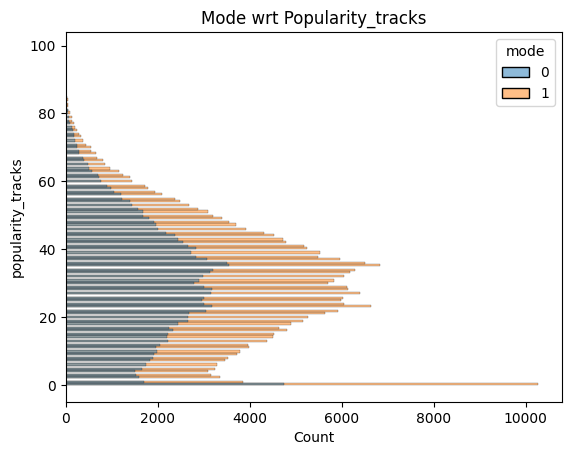

In [50]:
sns.histplot(merged_df, y="popularity_tracks", hue="mode").set(title='Mode wrt Popularity_tracks')

[Text(0.5, 1.0, 'Mode wrt Popularity_tracks')]

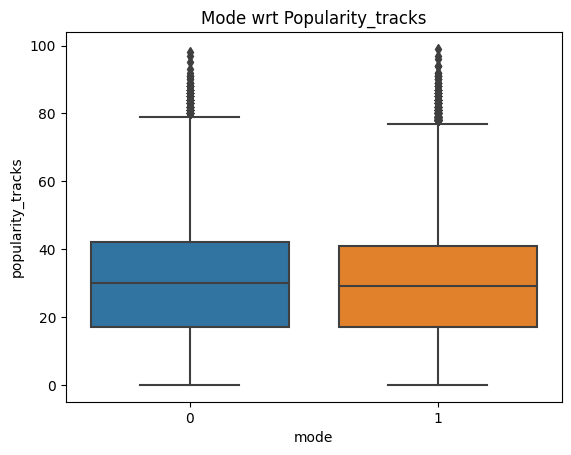

In [51]:
sns.boxplot(merged_df, x="mode", y="popularity_tracks").set(title='Mode wrt Popularity_tracks')

In [52]:
merged_df["mode"].value_counts()

1    286651
0    145577
Name: mode, dtype: int64

###### Outliers for speechiness

[Text(0.5, 1.0, 'speechiness')]

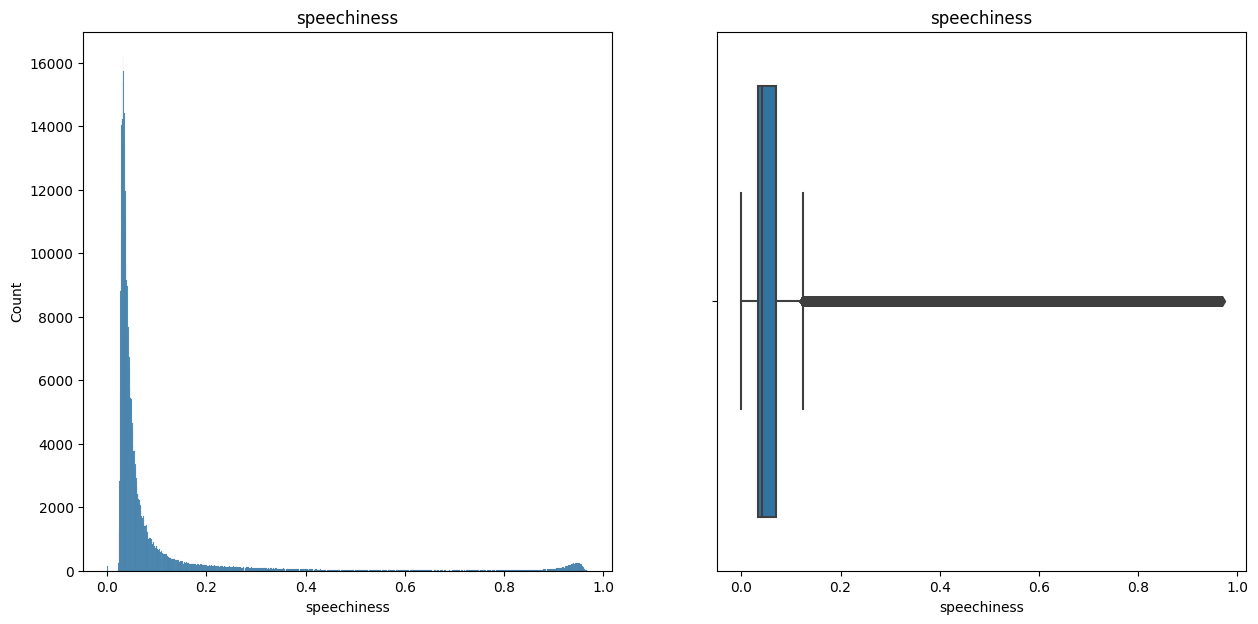

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(merged_df, x="speechiness", ax=axes[0]).set(title='speechiness')
sns.boxplot(merged_df, x="speechiness", ax=axes[1]).set(title='speechiness')

In [54]:
q75,q25 = merged_df["speechiness"].describe()["75%"], merged_df["speechiness"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

print("Outliers:", len(merged_df[(merged_df["speechiness"] < min) | (merged_df["speechiness"] > max)]))

Outliers: 58440


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[Text(0.5, 1.0, 'speechiness_log')]

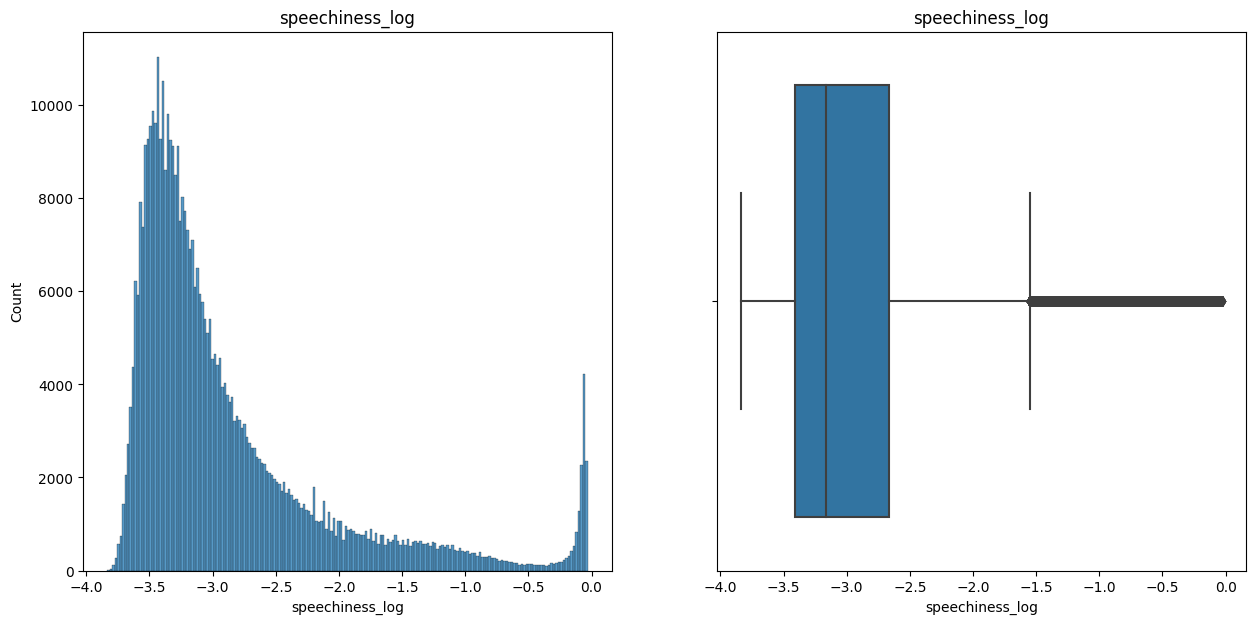

In [55]:
merged_df["speechiness_log"] = np.log(merged_df["speechiness"])

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(merged_df, x="speechiness_log", ax=axes[0]).set(title='speechiness_log')
sns.boxplot(merged_df, x="speechiness_log", ax=axes[1]).set(title='speechiness_log')

In [56]:
q75,q25 = merged_df["speechiness_log"].describe()["75%"], merged_df["speechiness_log"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

print("Outliers:", len(merged_df[(merged_df["speechiness_log"] < min) | (merged_df["speechiness_log"] > max)]))

Outliers: 36590


###### Outliers for instrumentalness

[Text(0.5, 1.0, 'instrumentalness')]

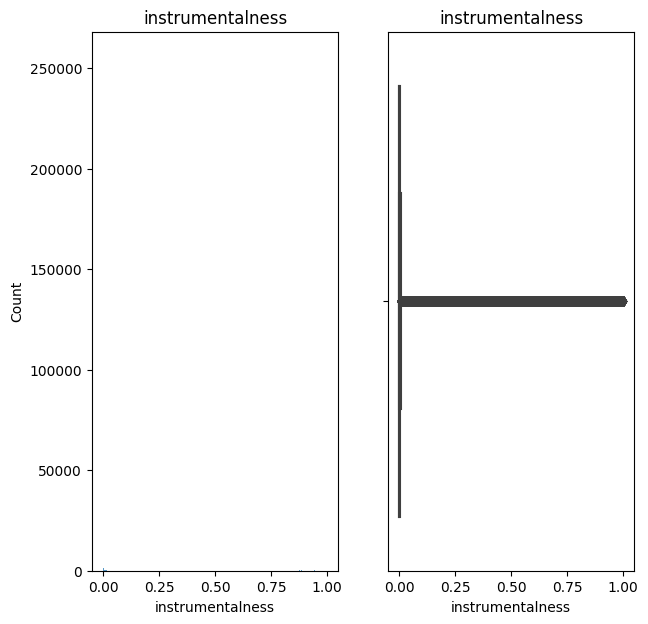

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(7, 7))
sns.histplot(merged_df, x="instrumentalness", ax=axes[0]).set(title='instrumentalness')
sns.boxplot(merged_df, x="instrumentalness", ax=axes[1]).set(title='instrumentalness')

In [58]:
q75,q25 = merged_df["instrumentalness"].describe()["75%"], merged_df["instrumentalness"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

print("Outliers:", len(merged_df[(merged_df["instrumentalness"] < min) | (merged_df["instrumentalness"] > max)]))

Outliers: 93323


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


[Text(0.5, 1.0, 'instrumentalness_log')]

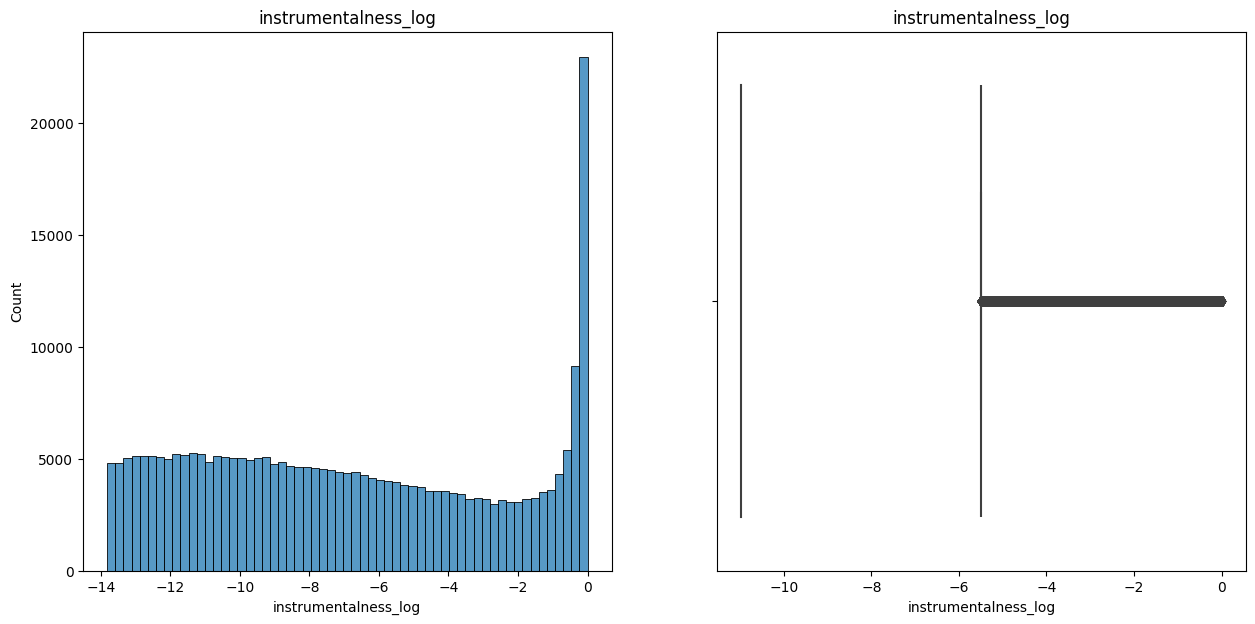

In [59]:
merged_df["instrumentalness_log"] = np.log(merged_df["instrumentalness"])

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(merged_df, x="instrumentalness_log", ax=axes[0]).set(title='instrumentalness_log')
sns.boxplot(merged_df, x="instrumentalness_log", ax=axes[1]).set(title='instrumentalness_log')

In [60]:
q75,q25 = merged_df["instrumentalness_log"].describe()["75%"], merged_df["instrumentalness_log"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

print("Outliers:", len(merged_df[(merged_df["instrumentalness_log"] < min) | (merged_df["instrumentalness_log"] > max)]))

Outliers: 0


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [61]:
top30popularity_values = merged_df["popularity_tracks"].value_counts().sort_values().tail(30).index.tolist()
print(top30popularity_values)

[17, 44, 16, 43, 42, 18, 19, 41, 20, 40, 39, 38, 21, 30, 31, 25, 22, 32, 26, 37, 24, 29, 33, 28, 34, 27, 23, 36, 35, 0]


In [62]:
merged_df[merged_df["instrumentalness"].isin(top30popularity_values)]

,id_tracks,name_tracks,popularity_tracks,duration_ms,explicit,danceability,energy,key,loudness,mode,...,name_artists,popularity_artists,year,month,day,dayofweek,weekofyear,duration_ms_log,speechiness_log,instrumentalness_log
90,6E4t6Sor5rWOLQDCAdI0vN,Despedida - Remasterizado,0,NaN,0,0.425,0.308,1,-21.085,0,...,Ignacio Corsini,23,1922,3,29,2,13,NaN,-2.929945,-inf
160,4Kv5krOFkBEK9JaBJP7hVt,El Cuchillo del Plata - Remasterizado,0,NaN,0,0.653,0.151,2,-16.657,0,...,Ignacio Corsini,23,1925,4,25,5,17,NaN,-1.857899,-inf
273,3jYXXtgH3t5ge4G2pa6unD,Muchachita Buena - Remasterizado,0,NaN,0,0.653,0.294,11,-16.306,0,...,Ignacio Corsini,23,1927,5,14,5,19,NaN,-2.444149,-inf
311,00xd0ZyPIJzMsH4hagU42Z,Malandrin - Remasterizado,0,NaN,0,0.645,0.233,1,-18.419,1,...,Ignacio Corsini,23,1928,5,14,0,20,NaN,-1.698269,-inf
315,0FoM1f9LJswtAy5BzdPeuS,Artículo de Lujo - Remasterizado,0,NaN,0,0.693,0.315,4,-15.164,1,...,Ignacio Corsini,23,1928,5,14,0,20,NaN,-2.692669,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470029,7GRImTchCheEHqU3tong8Q,别丢下我不管,45,NaN,0,0.576,0.465,1,-5.891,1,...,风小筝,33,2019,3,8,4,10,NaN,-3.645820,-inf
470030,4cB00WOFuQFLoDpnydcx8c,7UP,62,NaN,0,0.616,0.469,0,-7.380,1,...,Boy In Space,65,2019,5,30,3,22,NaN,-3.611918,-inf
470031,44r4zta6P9flkhKaVnbsvG,Freaks,70,NaN,0,0.674,0.568,1,-6.356,1,...,Jordan Clarke,56,2019,2,25,0,9,NaN,-3.199073,-inf
470033,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,NaN,0,0.528,0.673,4,-3.639,1,...,芝麻,36,2020,2,25,1,9,NaN,-3.460947,-inf


###### Outliers for liveness

[Text(0.5, 1.0, 'liveness')]

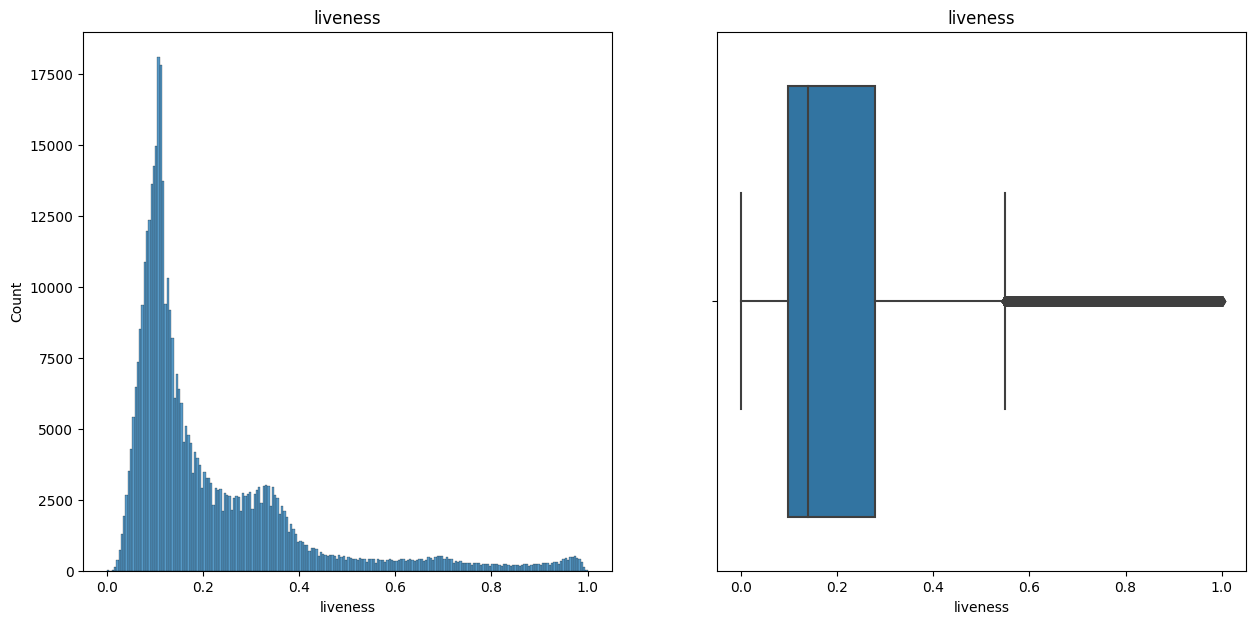

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(merged_df, x="liveness", ax=axes[0]).set(title='liveness')
sns.boxplot(merged_df, x="liveness", ax=axes[1]).set(title='liveness')

In [64]:
q75,q25 = merged_df["liveness"].describe()["75%"], merged_df["liveness"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

print("Outliers:", len(merged_df[(merged_df["liveness"] < min) | (merged_df["liveness"] > max)]))

Outliers: 30225


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[Text(0.5, 1.0, 'liveness_log')]

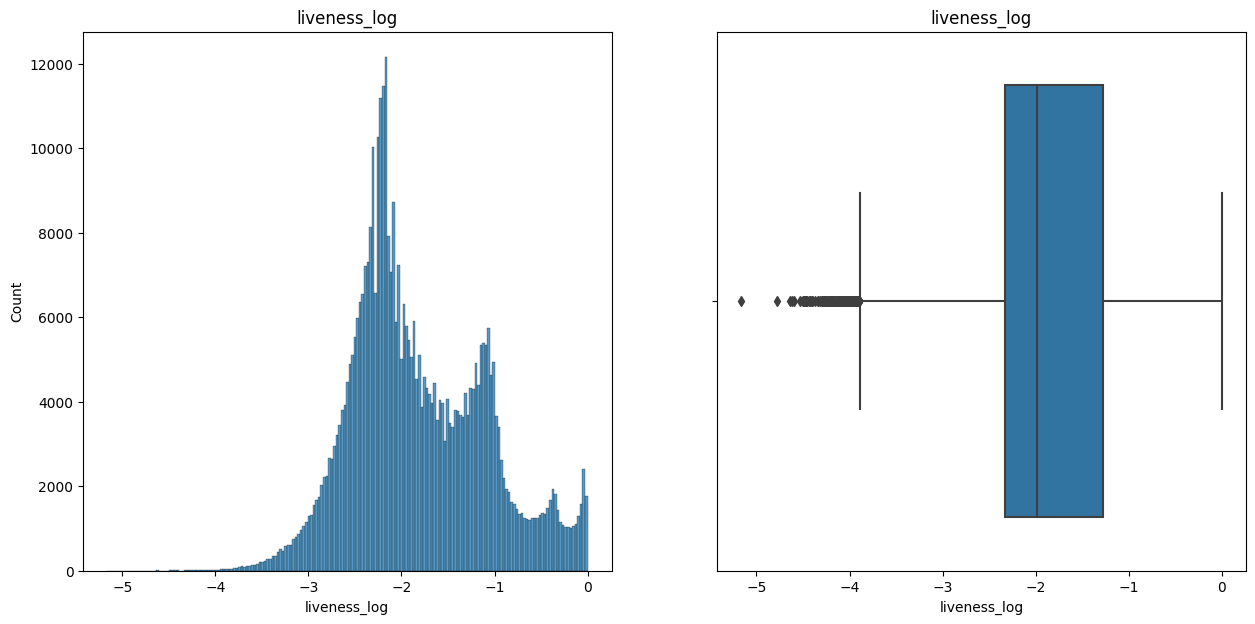

In [65]:
merged_df["liveness_log"] = np.log(merged_df["liveness"])

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(merged_df, x="liveness_log", ax=axes[0]).set(title='liveness_log')
sns.boxplot(merged_df, x="liveness_log", ax=axes[1]).set(title='liveness_log')

In [66]:
q75,q25 = merged_df["liveness_log"].describe()["75%"], merged_df["liveness_log"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

print("Outliers:", len(merged_df[(merged_df["liveness_log"] < min) | (merged_df["liveness_log"] > max)]))

Outliers: 265


###### Recheck popularity tracks

In [67]:
#sorted(merged_df["popularity_tracks"].unique().tolist())
top30popularity_values = merged_df["popularity_tracks"].value_counts().sort_values().tail(30).index.tolist()
print(top30popularity_values)

[17, 44, 16, 43, 42, 18, 19, 41, 20, 40, 39, 38, 21, 30, 31, 25, 22, 32, 26, 37, 24, 29, 33, 28, 34, 27, 23, 36, 35, 0]


In [68]:
merged_df["popularity_tracks"].value_counts().sort_values()

98        1
96        1
99        1
93        1
95        1
      ...  
27     9567
23     9805
36    10023
35    10389
0     15010
Name: popularity_tracks, Length: 100, dtype: int64

In [69]:
merged_df_copy = merged_df.copy()
merged_df_copy[merged_df_copy["popularity_tracks"].isin(top30popularity_values)]

,id_tracks,name_tracks,popularity_tracks,duration_ms,explicit,danceability,energy,key,loudness,mode,...,popularity_artists,year,month,day,dayofweek,weekofyear,duration_ms_log,speechiness_log,instrumentalness_log,liveness_log
56,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,NaN,0,0.434,0.1770,1,-21.180,1,...,23,1922,3,21,1,12,NaN,-2.972016,-3.825845,-1.551169
57,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,NaN,0,0.321,0.0946,7,-27.961,1,...,23,1922,3,21,1,12,NaN,-2.987764,-0.085558,-2.263364
58,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,NaN,0,0.548,0.0391,6,-23.228,1,...,23,1922,3,29,2,13,NaN,-1.877317,-0.069350,-1.910543
59,0l3BQsVJ7F76wlN5QhJzaP,El Vendaval - Remasterizado,0,NaN,0,0.370,0.3720,2,-17.138,1,...,23,1922,3,21,1,12,NaN,-2.447611,-7.291948,-0.073647
60,0xJCJ9XSNcdTIz0QKmhtEn,La Maleva - Remasterizado,0,NaN,0,0.339,0.0958,8,-26.944,1,...,23,1922,3,29,2,13,NaN,-2.937463,-0.031491,-2.095571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470011,21gm9fNWcgpWyPY3a9t7FZ,What Do You See,18,NaN,0,0.426,0.7330,4,-5.933,1,...,13,2015,7,31,4,31,NaN,-3.130407,-7.787232,-1.010601
470018,2pcxTewiMp47AJDKs999DA,Yoga Healing,31,NaN,0,0.206,0.1950,6,-20.798,1,...,49,2016,10,15,5,41,NaN,-3.155901,-0.105361,-2.207275
470019,3s4zQCLsI9YG2XSw7fmkeO,Brahms' Lullaby,44,NaN,0,0.540,0.2740,3,-11.902,1,...,64,2017,10,25,2,43,NaN,-3.329807,-0.041864,-1.431292
470020,04dPG3XQ85mcB1sADQYS9N,爱河,43,NaN,0,0.653,0.4560,11,-10.475,1,...,31,2017,3,23,3,12,NaN,-3.480241,-9.790159,-1.980502


In [70]:
len(merged_df["id_artists"].unique())

43381

# Clean Dataframe

In [71]:
merged_df[merged_df["name_tracks"].duplicated()]

,id_tracks,name_tracks,popularity_tracks,duration_ms,explicit,danceability,energy,key,loudness,mode,...,popularity_artists,year,month,day,dayofweek,weekofyear,duration_ms_log,speechiness_log,instrumentalness_log,liveness_log
85,5cUFFY2Atw4QeFitueQCt2,El Huerfano - Remasterizado,0,NaN,0,0.366,0.0749,7,-26.340,1,...,23,1922,3,29,2,13,NaN,-2.518257,-0.079043,-2.145581
101,2gFUqcLFUDVXcWmeKAOnGd,Pobre Cotorro - Remasterizado,0,NaN,0,0.502,0.2980,5,-15.321,0,...,23,1923,3,29,3,13,NaN,-2.519498,-0.084469,-1.255266
117,0OJgo5mwk8SirgbF8Ht4lA,Juan de los Santos Arena - Remasterizado,0,NaN,0,0.408,0.1980,4,-23.185,1,...,23,1924,3,29,5,13,NaN,-2.896792,-0.105361,-2.171557
121,2xY6aTzgJS9nI9kcG3F2bh,El Beso de la Muerte - Remasterizado,0,NaN,0,0.494,0.1110,5,-23.239,1,...,23,1924,3,29,5,13,NaN,-2.728763,-0.379797,-1.737271
127,5HrVPZAMDLW3qs0TNt6Wdv,Martín Fierro - Remasterizado,0,NaN,0,0.546,0.3050,8,-21.329,1,...,23,1924,3,29,5,13,NaN,-2.962297,-0.105361,-2.171557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470022,3QAsHztMu2rzflap6WJhps,Push,0,NaN,0,0.695,0.6350,7,-5.223,1,...,30,2016,11,7,0,45,NaN,-2.482909,-3.877622,-2.273026
470023,3vdHJXN7wYG0g2uB8QyfrS,Into the Woods,47,NaN,0,0.639,0.1230,9,-20.339,0,...,66,2017,3,31,4,13,NaN,-2.602340,-0.064005,-2.446455
470027,2goIIAg5kdzfwclJMFZM33,Everything,64,NaN,0,0.609,0.6810,10,-4.084,1,...,58,2018,4,10,1,15,NaN,-2.964234,-inf,-2.471004
470031,44r4zta6P9flkhKaVnbsvG,Freaks,70,NaN,0,0.674,0.5680,1,-6.356,1,...,56,2019,2,25,0,9,NaN,-3.199073,-inf,-1.801810


In [72]:
# remove outliers in liveness and speechiness
merged_df["duration_ms_log"] = np.log(merged_df["duration_ms"])
q75,q25 = merged_df["duration_ms_log"].describe()["75%"], merged_df["duration_ms_log"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

df_clean = merged_df[(merged_df["duration_ms"] >= min) | (merged_df["duration_ms"] <= max)]
df_clean.drop(labels = ['duration_ms'], axis = 1, inplace= True)

q75,q25 = merged_df["liveness"].describe()["75%"], merged_df["liveness"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

df_clean = df_clean[(df_clean["liveness"] >= min) | (df_clean["liveness"] <= max)]

q75,q25 = merged_df["speechiness"].describe()["75%"], merged_df["speechiness"].describe()["25%"]
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

df_clean = df_clean[(df_clean["speechiness"] >= min) | (df_clean["speechiness"] <= max)]


<ipython-input-72-c4f35c676b3b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(labels = ['duration_ms'], axis = 1, inplace= True)
